In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [107]:
fpath = "C:\\Users\\123\\Documents\\ВШ\\DS\\"

In [167]:
import pandas as pd
df=pd.read_csv(fpath and 'cian_data_all_city.csv')

In [166]:
df.head()

,mean,max
location,,
Владивосток,185245.780576,465008.0
Екатеринбург,146291.069414,446250.0
Иркутск,148589.769524,346154.0
Красноярск,132126.968689,296516.0
Магадан,138786.183607,255786.0


In [169]:
df['price_square_meter']=round(df['price']/df['total_meters'])

In [ ]:
# df[df['price_square_meter']==83697479.0]
# В П.-Камчатском есть квартира со стоимостью около 100 млрд. рублей. Удалим эту строку
index_names = df[ df['price_square_meter'] == 83697479.0].index
df.drop(index_names, inplace = True)
df[df['price_square_meter']==83697479.0]

In [126]:
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex,price_square_meter
0,VESPER,developer,https://www.cian.ru/sale/flat/262519758/,Москва,sale,flat,5,21,2,110.60,-1,0,103787040.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky,938400.0
1,Виктория Иванова,realtor,https://www.cian.ru/sale/flat/302016445/,Москва,sale,flat,3,5,3,116.00,-1,0,98000000.0,Пресненский,Столярный переулок,3к34,Улица 1905 года,Рассвет Loft-Studio,844828.0
2,Главстрой,developer,https://www.cian.ru/sale/flat/301772281/,Москва,sale,flat,2,8,2,48.83,-1,0,24219680.0,Котловка,31/2,31/2,Профсоюзная,Новые Академики ЖК,496000.0
3,ID 108172779,real_estate_agent,https://www.cian.ru/sale/flat/301496936/,Москва,sale,flat,7,8,1,53.20,-1,0,58786000.0,Таганский,Славянская площадь,2/5с1,Китай-город,LUMIN,1105000.0
4,VESPER,developer,https://www.cian.ru/sale/flat/286258299/,Москва,sale,flat,5,9,2,104.20,-1,0,143796000.0,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya,1380000.0


In [173]:
# Средняя и максимальная цена за квадратный метр по городам
df.groupby(df["location"]).price_square_meter.agg(["mean", "max"])


,mean,max
location,,
Владивосток,185245.780576,465008.0
Екатеринбург,146291.069414,446250.0
Иркутск,148589.769524,346154.0
Красноярск,132126.968689,296516.0
Магадан,138786.183607,255786.0
Москва,823991.921389,4021514.0
Новосибирск,150835.815735,320000.0
Петропавловск-Камчатский,142963.508257,317604.0
Псков,90070.622066,170213.0


In [190]:
# Средняя и максимальная этажность домов по городам
df.groupby(df["location"]).floors_count.agg(["mean", "max"])


,mean,max
location,,
Владивосток,16.933453,30
Екатеринбург,17.611714,52
Иркутск,12.051429,19
Красноярск,14.275930,27
Магадан,5.003279,9
Москва,20.848375,85
Новосибирск,16.902692,30
Петропавловск-Камчатский,5.009174,15
Псков,7.596244,18


In [119]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

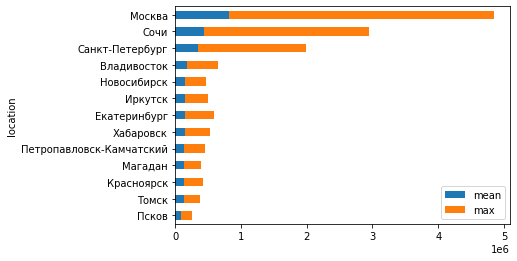

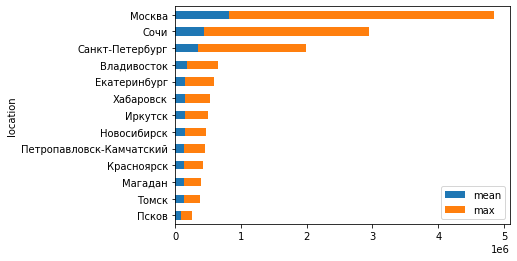

In [197]:
df_aggr=df.groupby(df["location"]).price_square_meter.agg(["mean", "max"])
# # Столбчатая диаграмма
df_aggr.sort_values(['mean']).plot(kind='barh',stacked = True)
plt.show()
df_aggr.sort_values(['max']).plot(kind='barh',stacked = True)
plt.show()


Из графика видно, что: 
1) В г. Москва самая высокая средняя и максимальная цена за кв.метр
2) В тройку лидеров по средней и максимальной цене за кв. метр попали: Москва, Санкт-Петербург и Сочи
3) Топ 3 по самой низкой средней цене за кв.метр: Псков, Томск, Красноярск
3) Топ 3 по самой низкой макимальной цене за кв.метр: Псков, Томск, Магадан

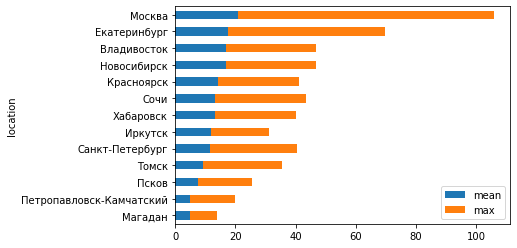

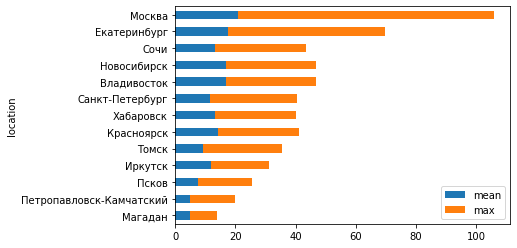

In [198]:
df_aggr=df.groupby(df["location"]).floors_count.agg(["mean", "max"])
df_aggr.sort_values(['mean']).plot(kind='barh',stacked = True)
df_aggr.sort_values(['max']).plot(kind='barh',stacked = True)

Из графика видно, что: 
1) В г. Магадане дома не превышают 9 этажей (это связано с вечной мерзлотой, дома не могут строить выше 9 этажей)
2) Топ 2 по этажности домов попали Москва и Екатеринбург


In [230]:
df_aggr=df.groupby(df["location"]).floors_count.agg(["mean", "max"])
# df_aggr.index
df_aggr['mean']
# df1
# df1['mean']

location
Владивосток                 16.933453
Екатеринбург                17.611714
Иркутск                     12.051429
Красноярск                  14.275930
Магадан                      5.003279
Москва                      20.848375
Новосибирск                 16.902692
Петропавловск-Камчатский     5.009174
Псков                        7.596244
Санкт-Петербург             11.493601
Сочи                        13.377495
Томск                        9.384289
Хабаровск                   13.151139
Name: mean, dtype: float64

Круговая диаграмма.
В данном случае не информативна.
Делала больше для пробы и чтобы разобраться в параметрах

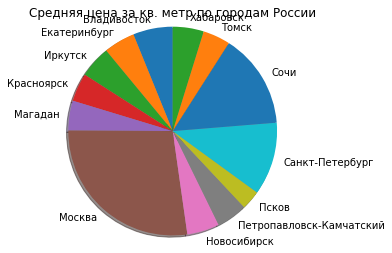

In [279]:

df_aggr=df.groupby(df["location"]).price_square_meter.agg(["mean", "max"])


plt.pie(df_aggr['mean'], labels = df_aggr.index, #colors=colors, 
    startangle=90, shadow = True,
    radius = 1.2,# autopct = '%1.1f%%', 
    pctdistance=0.7)
plt.title("Средняя цена за кв. метр по городам России")

plt.show()

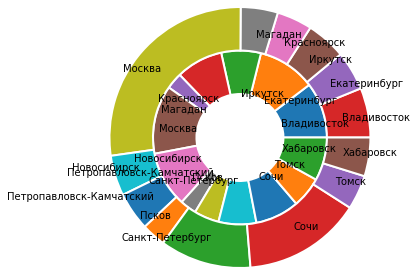

In [278]:

df_price=df.groupby(df["location"]).price_square_meter.agg(["mean", "max"])
labels1 = df_price.index

labels2 = df_flor.index

width = 0.5

wedge_properties = {"width":width, "edgecolor":"w",'linewidth': 2}

plt.pie(df_flor['mean'], labels=labels1, labeldistance=0.5,
        wedgeprops=wedge_properties)
plt.pie(df_price['mean'], labels=labels2, labeldistance=0.8, 
        radius=2-width, wedgeprops=wedge_properties)
plt.show()